In [6]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


#Espace d'importation des librairies necessaires pour le projet

In [0]:
%matplotlib inline
import os
import pandas as pd
import pickle
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#Importation du datatset

In [0]:
cp '/gdrive/My Drive/Database.zip' /

In [0]:
dataset = '/Database.zip'

In [0]:
# Desipage le dataset
import zipfile
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall('/')

#Verification du contenu du dataset

In [12]:
ll /Database/BaseDApprentissage/Training_Images-avecVeriteTerrain\(GT\)

total 1568
drwxr-xr-x 2 root 12288 Jan 25 15:29 00000/
drwxr-xr-x 2 root 77824 Jan 25 15:29 00001/
drwxr-xr-x 2 root 77824 Jan 25 15:29 00002/
drwxr-xr-x 2 root 57344 Jan 25 15:29 00003/
drwxr-xr-x 2 root 69632 Jan 25 15:29 00004/
drwxr-xr-x 2 root 69632 Jan 25 15:29 00005/
drwxr-xr-x 2 root 20480 Jan 25 15:29 00006/
drwxr-xr-x 2 root 61440 Jan 25 15:29 00007/
drwxr-xr-x 2 root 57344 Jan 25 15:29 00008/
drwxr-xr-x 2 root 65536 Jan 25 15:29 00009/
drwxr-xr-x 2 root 69632 Jan 25 15:29 00010/
drwxr-xr-x 2 root 53248 Jan 25 15:29 00011/
drwxr-xr-x 2 root 69632 Jan 25 15:29 00012/
drwxr-xr-x 2 root 69632 Jan 25 15:29 00013/
drwxr-xr-x 2 root 36864 Jan 25 15:29 00014/
drwxr-xr-x 2 root 20480 Jan 25 15:29 00015/
drwxr-xr-x 2 root 20480 Jan 25 15:29 00016/
drwxr-xr-x 2 root 36864 Jan 25 15:29 00017/
drwxr-xr-x 2 root 40960 Jan 25 15:29 00018/
drwxr-xr-x 2 root 12288 Jan 25 15:29 00019/
drwxr-xr-x 2 root 16384 Jan 25 15:29 00020/
drwxr-xr-x 2 root 16384 Jan 25 15:29 00021/
drwxr-xr-x 2 root 204

# chargement et conversion du repertoire /Database/BaseDApprentissage/Training_HOG/HOG/HOG_02 sous un fichier csv


In [0]:
# Utilisons la methode walk() pour générer les noms de fichiers dans une arborescence de répertoires en parcourant l'arborescence
train_hog_path = '/Database/BaseDApprentissage/Training_HOG/HOG/HOG_02'
def read_hog2(train_hog_path):
  for path, dirs, files in os.walk(train_hog_path):
    tab_hog = []
    for file in files:
      features = []
      hog_file = os.path.join(path, file)
      with open(hog_file, "r") as fic:
        features = fic.read().strip().split('\n')
      image_feateares = ''
      for feat in features:
        image_feateares = image_feateares + feat + ';'
      image_feateares = image_feateares+'\n'
      with open("data_train.csv", "a") as fichier:
        fichier.write(image_feateares)

#Chargement et conversion du repertoire /Database/BaseDeTest/Test_HOG/HOG_02 en csv


In [0]:
test_hog_path = '/Database/BaseDeTest/Test_HOG/HOG_02' 
def read_hog2(test_hog_path):
  for path, dirs, files in os.walk(test_hog_path):
    tab_hog = []
    for file in files:
      features = []
      hog_file = os.path.join(path, file)
      with open(hog_file, "r") as fic:
        features = fic.read().strip().split('\n')
      #print(features)
      image_feateares = ''
      for feat in features:
        image_feateares = image_feateares + feat + ';'
      image_feateares = image_feateares+'\n'
      with open("data_test.csv", "a") as fichier:
        fichier.write(image_feateares)

In [15]:
df = pd.read_csv('/gdrive/My Drive/data_train.csv', header=None, sep=';')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.084114,0.012509,0.001139,0.041691,0.443293,0.033574,0.000213,0.010892,0.125005,0.072376,0.006039,0.044455,0.435786,0.064728,0.045807,0.058674,0.192964,0.040823,0.038744,0.142044,0.480704,0.036586,0.000000,0.022930,0.158162,0.085586,0.153284,0.293540,0.280026,0.076133,0.047578,0.035619,0.077658,0.054524,0.005042,0.018028,0.183104,0.106162,0.300339,0.111019,...,0.273770,0.121657,0.041059,0.036930,0.023378,0.026503,0.107648,0.139748,0.116941,0.124062,0.126452,0.031412,0.021391,0.006922,0.123032,0.129536,0.037063,0.046783,0.199411,0.219173,0.077214,0.024341,0.322829,0.072914,0.124794,0.115124,0.044732,0.049051,0.176152,0.042140,0.019567,0.044634,0.040081,0.042722,0.191935,0.371952,0.554959,0.071317,0.004744,0
1,0.042234,0.010996,0.000139,0.106656,0.431576,0.061183,0.000412,0.003250,0.077768,0.008534,0.000000,0.086742,0.439469,0.183968,0.077223,0.073741,0.176993,0.093957,0.041302,0.126331,0.443958,0.081025,0.000675,0.009133,0.186166,0.049147,0.087735,0.211209,0.238184,0.098414,0.239765,0.145102,0.022401,0.005190,0.000000,0.022031,0.126784,0.321207,0.208654,0.058249,...,0.098019,0.091205,0.108165,0.094924,0.007133,0.011339,0.061859,0.107373,0.025088,0.098446,0.102204,0.018499,0.000565,0.001575,0.365358,0.229380,0.015146,0.051255,0.083766,0.014316,0.000000,0.007598,0.652584,0.152075,0.047889,0.123778,0.085205,0.021854,0.017265,0.011444,0.050590,0.076776,0.023667,0.071095,0.219338,0.295188,0.125168,0.012118,0.143777,0
2,0.089617,0.080208,0.011471,0.053661,0.466442,0.026843,0.000000,0.016241,0.090332,0.085860,0.020544,0.041616,0.324918,0.101294,0.150956,0.090461,0.125183,0.089280,0.099953,0.203604,0.490225,0.030246,0.000000,0.025518,0.066473,0.128870,0.188204,0.233248,0.112596,0.289057,0.160155,0.036808,0.033466,0.014653,0.005625,0.008893,0.115329,0.241982,0.330389,0.080242,...,0.099684,0.036196,0.315712,0.131383,0.000000,0.000125,0.036367,0.081836,0.015582,0.027465,0.089598,0.036550,0.000000,0.016871,0.406918,0.222173,0.027702,0.040895,0.037954,0.004202,0.000000,0.024044,0.686508,0.204959,0.052816,0.057286,0.140188,0.045719,0.001459,0.004172,0.060764,0.161974,0.055433,0.087877,0.135764,0.116282,0.047458,0.018792,0.205772,0
3,0.124598,0.086021,0.008510,0.063973,0.390833,0.040249,0.014065,0.025400,0.088090,0.055588,0.012765,0.073985,0.197069,0.175948,0.267033,0.055208,0.115622,0.098738,0.167282,0.245788,0.429261,0.018997,0.016764,0.019955,0.045030,0.104228,0.227389,0.144581,0.048101,0.356929,0.311427,0.020584,0.016311,0.003543,0.002399,0.020217,0.079115,0.342116,0.357136,0.023378,...,0.086825,0.114661,0.291040,0.117610,0.000282,0.007663,0.101296,0.059343,0.014748,0.017197,0.060911,0.007945,0.000368,0.025109,0.466666,0.140878,0.009753,0.013572,0.019532,0.000000,0.013675,0.059308,0.676282,0.041870,0.089205,0.064391,0.135832,0.016529,0.001064,0.005590,0.133640,0.058513,0.068571,0.088442,0.114209,0.075747,0.019348,0.007773,0.336546,0
4,0.109809,0.049416,0.000206,0.034962,0.428900,0.045921,0.001986,0.013491,0.193928,0.070295,0.017230,0.088495,0.334584,0.048942,0.020809,0.038173,0.154890,0.041355,0.012564,0.086536,0.462236,0.052928,0.007944,0.018456,0.100333,0.120207,0.266226,0.289594,0.389719,0.055159,0.030201,0.011018,0.161546,0.027468,0.029685,0.087095,0.151991,0.127132,0.166441,0.100937,...,0.018025,0.041075,0.168102,0.051055,0.002203,0.031068,0.124340,0.236702,0.018377,0.004290,0.007833,0.005589,0.003926,0.048045,0.515131,0.219238,0.123248,0.017909,0.023501,0.009108,0.002287,0.053326,0.427298,0.030839,0.006291,0.010453,0.115986,0.069219,0.000064,0.047431,0.237433,0.049901,0.012061,0.019783,0.103546,0.041708,0.000727,0.108621,0.482985,0


In [0]:
trainData = df.iloc[:,:-1].values
trainLabels = df.iloc[:,-1].values

In [17]:
trainLabels

array([ 0,  0,  0, ..., 42, 42, 42])

In [18]:
data_test = pd.read_csv('/gdrive/My Drive/data_test.csv', header=None, sep=';')
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.077112,0.049983,0.143680,0.151308,0.038555,0.082894,0.166349,0.090185,0.104188,0.100738,0.215535,0.177288,0.055930,0.063975,0.099278,0.140718,0.171471,0.095544,0.120509,0.089032,0.036453,0.142469,0.134749,0.060350,0.377701,0.265219,0.163308,0.141554,0.073729,0.074374,0.126787,0.103715,0.012444,0.019049,0.027556,0.022371,0.007593,0.003344,0.002644,0.012993,...,0.008126,0.006722,0.007335,0.091184,0.063797,0.015779,0.001250,0.039124,0.086540,0.075368,0.019438,0.473649,0.637056,0.015327,0.012919,0.106883,0.143415,0.087703,0.025112,0.024885,0.038218,0.010486,0.024725,0.047442,0.106276,0.083919,0.047099,0.069653,0.105911,0.030990,0.009593,0.095782,0.164022,0.101219,0.056227,0.084591,0.029830,0.006890,0.018699,16
1,0.119052,0.003266,0.006143,0.247642,0.188298,0.013261,0.002400,0.108383,0.101999,0.017423,0.004926,0.266080,0.295208,0.013048,0.001328,0.153389,0.315290,0.023825,0.031323,0.182069,0.206065,0.010951,0.001659,0.334060,0.274764,0.048709,0.029293,0.129379,0.185493,0.116980,0.092102,0.378674,0.030642,0.017596,0.008270,0.133062,0.142838,0.001929,0.001568,0.045484,...,0.127043,0.037253,0.057937,0.097563,0.026142,0.007395,0.014669,0.395792,0.390840,0.049571,0.127127,0.142368,0.036735,0.011474,0.079633,0.178549,0.028302,0.073083,0.214105,0.096671,0.023134,0.032192,0.427316,0.047514,0.076725,0.060989,0.167363,0.246273,0.067284,0.031518,0.025786,0.002323,0.026539,0.213288,0.317063,0.171908,0.053293,0.022978,0.010473,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.309462,0.351681,0.000060,0.010713,0.148502,0.104254,0.000000,0.000000,0.208257,0.217466,0.001007,0.000000,0.000000,0.000000,0.000000,0.000000,0.393222,0.447801,0.000000,0.006520,0.130205,0.177812,0.010616,0.022378,0.261561,0.278857,0.001151,0.004384,0.069356,0.060222,0.000000,0.000000,0.127693,0.179755,0.001161,...,0.452165,0.447671,0.033033,0.023920,0.003452,0.000924,0.004349,0.018030,0.385495,0.312827,0.000000,0.000529,0.005570,0.008301,0.006485,0.021533,0.157817,0.107365,0.000000,0.013324,0.134879,0.064517,0.048551,0.002916,0.430287,0.472690,0.000000,0.000000,0.024807,0.012307,0.000395,0.000000,0.208758,0.179007,0.000000,0.042548,0.374231,0.062075,0.001808,38
3,0.026402,0.036410,0.091313,0.107078,0.079168,0.111932,0.039147,0.007433,0.013309,0.009527,0.015879,0.080135,0.295904,0.388529,0.182774,0.070541,0.002436,0.003864,0.142704,0.374793,0.298518,0.097773,0.009539,0.000000,0.002447,0.001580,0.013639,0.375906,0.408877,0.203929,0.106511,0.110688,0.001214,0.000088,0.004111,0.062549,0.253033,0.245725,0.326384,0.126469,...,0.055659,0.358907,0.129007,0.031768,0.097295,0.092958,0.141710,0.100115,0.028620,0.058216,0.096667,0.100782,0.203848,0.138290,0.172493,0.236578,0.049182,0.052278,0.102717,0.179673,0.180185,0.098016,0.322441,0.111612,0.068713,0.170322,0.070401,0.027510,0.046111,0.089039,0.199487,0.152112,0.166327,0.176707,0.011758,0.122038,0.548236,0.144410,0.222143,33
4,0.042312,0.139276,0.093038,0.039349,0.156275,0.304959,0.044027,0.028507,0.119267,0.188071,0.210651,0.100037,0.233653,0.214910,0.048232,0.048967,0.040066,0.103603,0.094565,0.185819,0.251838,0.203746,0.092921,0.043589,0.067133,0.133992,0.182767,0.194022,0.281615,0.329073,0.073014,0.047348,0.077590,0.085849,0.133501,0.119353,0.183468,0.094354,0.038752,0.026333,...,0.018236,0.153695,0.251007,0.055598,0.035857,0.148731,0.430347,0.066502,0.136286,0.167263,0.223180,0.046610,0.197649,0.136416,0.073898,0.016792,0.327745,0.350210,0.064759,0.044657,0.210486,0.139218,0.000000,0.139371,0.108506,0.138796,0.287241,0.080108,0.081362,0.097460,0.274602,0.149952,0.372411,0.133690,0.149661,0.089199,0.088972,0.045503,0.046976,11


In [0]:
testData = data_test.iloc[:,:-1].values
testLabels = data_test.iloc[:,-1].values

# Construction du modèle de RandomForestClassifier


In [0]:
##Commençons par import des librairies
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# RandomForest avec les paramettres par defaut


In [21]:
## construction du model
rdforest = RandomForestClassifier()
rdforest.fit(trainData, trainLabels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Faire de nouvelles prédictions sur le modèle de RandomForest

In [0]:
predictions= rdforest.predict(testData)

In [23]:
testLabels

array([16,  1, 38, ...,  6,  7, 10])

In [24]:
predictions

array([16,  1, 38, ...,  3,  7, 10])

#Calcul de precision du model random forest


In [0]:
from sklearn.metrics import accuracy_score

In [26]:
print('Accuracy: ', accuracy_score(testLabels, predictions))

Accuracy:  0.9593032462391132


#Rapport de classification de random forest

In [31]:
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        60
           1       0.98      0.98      0.98       720
           2       0.93      0.99      0.96       750
           3       0.98      0.90      0.94       450
           4       0.96      0.98      0.97       660
           5       0.90      0.94      0.92       630
           6       0.98      0.83      0.90       150
           7       0.96      0.95      0.96       450
           8       0.93      0.93      0.93       450
           9       0.96      1.00      0.98       480
          10       0.99      1.00      0.99       660
          11       0.92      0.96      0.94       420
          12       0.99      0.98      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.95      0.98      0.96       210
          16       1.00      0.99      0.99       150
          17       1.00    

#Matrice de confusion du model forêt aleatoire

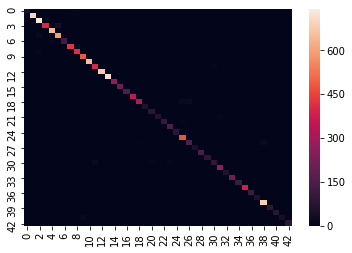

In [32]:
sns.heatmap(confusion_matrix(testLabels, predictions))

# Construction du model SVM

## Import de librairie 


In [0]:
from sklearn.svm import SVC

# SVM avec les parametres par defaut

In [30]:
svm = SVC(gamma='auto')
svm.fit(trainData, trainLabels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Faire de nouvelles prédictions sur model SVM

---



---



In [0]:
predictions2= svm.predict(testData)

In [34]:
predictions2


array([16,  1, 38, ...,  4,  7, 10])

In [0]:
testLabels

array([16,  1, 38, ...,  6,  7, 10])

#Precision du model svm

In [0]:
print('Accuracy2: ', accuracy_score(testLabels, predictions2))

Accuracy2:  0.8092636579572446


#Matrice de confusion du modèl svm

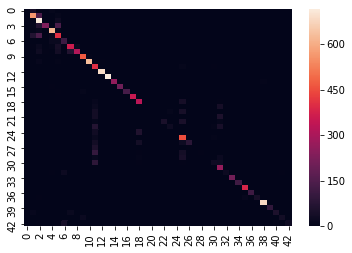

In [0]:
sns.heatmap(confusion_matrix(testLabels, predictions2))

#Rapport de classification

In [0]:
print(classification_report(testLabels, predictions2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.78      0.78      0.78       720
           2       0.61      0.96      0.75       750
           3       0.96      0.51      0.67       450
           4       0.90      0.94      0.92       660
           5       0.58      0.64      0.61       630
           6       0.62      0.75      0.68       150
           7       0.81      0.81      0.81       450
           8       0.93      0.70      0.80       450
           9       0.93      0.98      0.95       480
          10       0.98      0.96      0.97       660
          11       0.44      0.96      0.60       420
          12       0.98      1.00      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      0.97      0.98       270
          15       1.00      0.96      0.98       210
          16       1.00      0.88      0.94       150
          17       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM Linear

In [0]:
import time
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Utilisons le linear SVC 
svc = LinearSVC()
svc.fit(trainData, trainLabels)
predictions3=svc.predict(testData)
print('Accuracy: ', accuracy_score(testLabels, predictions3))
#print('Test Accuracy of SVC = ', round(svc.score(testLabels, predictions3), 4))

Accuracy:  0.9577197149643706


In [37]:
predictions3


array([16,  1, 38, ...,  4,  7, 10])